In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

# Implementation of the Armijo Rule

In [2]:
def armijo(f, gradf, x, d, gamma=10**(-4), beta=0.5):
    '''f is a function and gradf its gradient, x a point in the domain of f, d is a descent direction, and beta and gamma
    are parameters of the Armijo algorithm
    '''
    sigma = 1
    
    while f(x + sigma * d) - f(x) > sigma * gamma * gradf(x)@d:
        sigma = beta * sigma

    return sigma

def steepestdesc_armijo(f, gradf, x0, e = 10**(-3), maxit = 10**(4)):
    '''returns the iterates of the steepest descent algorithm applied on f 
    e is a tolerance parameter and maxit is the maximum number of iterations.
    '''
    x = x0
    gradf_x = gradf(x)
    iterates = [x] + [0]*maxit
    n_iter = 0
    while n_iter < maxit and np.sqrt(gradf_x@gradf_x) > e:
        ## We get first the step size using the Armijo rule with minus gradient as descent direction
        sigma = armijo(f, gradf, x, -gradf_x)
        x = x - sigma * gradf_x
        gradf_x = gradf(x)
        iterates[n_iter+1] = x 
        n_iter+=1
    return np.array(iterates[:n_iter])

# Implementation of the Powell-Wolfe Rule

In [3]:
def powellwolfe(f, gradf, x, d, eta, gamma=10**(-4)):
    '''f is a function and gradf its gradient, x a point in the domain of f, d is a descent direction, and beta and gamma
    are parameters of the Armijo algorithm
    '''
    sigma_minus = 1
    
    # The first if and else conditions guarantee having a segment [sigma_minus, sigma_plus]
    # such that sigma_minus satisfies the armijo condition and sigma_plus does not
    if f(x + sigma_minus * d) - f(x) <= sigma_minus * gamma * gradf(x)@d:
        if gradf(x + sigma_minus * d)@d >= eta * gradf(x)@d:
            return(sigma_minus) # We are done
        # Determination of sigma_plus
        sigma_plus = 2
        while f(x + sigma_plus * d) - f(x) <= sigma_plus * gamma * gradf(x)@d:
            sigma_plus = 2*sigma_plus
        ## here sigma_plus is the smallest 2^k that does not satisfy the Armijo rule
        sigma_minus = sigma_plus/2 ## satisfies the Armijo condition
        
    else:
        sigma_minus = 1/2
        while f(x + sigma_minus * d) - f(x) > sigma_minus * gamma * gradf(x)@d:
            sigma_minus = sigma_minus/2
        sigma_plus = 2*sigma_minus # does not satisfy the Armijo condition
        
    while gradf(x + sigma_minus * d)@d < eta * gradf(x)@d:
        sigma = (sigma_minus + sigma_plus)/2
        if f(x + sigma * d) - f(x) <= sigma * gamma * gradf(x)@d:
            sigma_minus = sigma 
            #print(sigma_minus)
        else:
            sigma_plus = sigma

    return sigma_minus



def steepestdesc_pw(f, gradf, x0, e = 10**(-3), maxit = 10**(4), eta=0.9):
    '''returns the iterates of the steepest descent algorithm applied on f 
    e is a tolerance parameter and maxit is the maximum number of iterations.
    '''
    x = x0
    gradf_x = gradf(x)
    iterates = [x] + [0]*maxit
    n_iter = 0
    while n_iter < maxit and np.sqrt(gradf_x@gradf_x) > e:
        ## We get first the step size using the Armijo rule with minus gradient as descent direction
        sigma = powellwolfe(f, gradf, x, -gradf_x, eta)
        x = x - sigma * gradf_x
        gradf_x = gradf(x)
        iterates[n_iter+1] = x 
        n_iter+=1
    return np.array(iterates[:n_iter])

In [4]:
f = lambda x: (x[0]-1)**2 + (x[1]-1)**2 + 1
gradf = lambda x: np.array([2 * (x[0]-1), 2 * (x[1]-1)])

# Using -gradf(x) as descent direction
powellwolfe(f, gradf, np.array([0,-1]), np.array([2,4]), 0.000009)

0.5

In [5]:
armijo(f, gradf, np.array([0,-1]), np.array([2,4]))

0.5

In [6]:
f = lambda x: 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
gradf = lambda x: np.array([ - 400 * x[0] * (x[1]-x[0]**2) - 2 * (1-x[0]), 200 * (x[1]-x[0]**2)])

steepestdesc_pw(f, gradf, np.array([1,-0.5]))

array([[ 1.        , -0.5       ],
       [-1.34375   ,  0.671875  ],
       [ 1.05507469,  1.55764771],
       ...,
       [ 1.00078201,  1.0015695 ],
       [ 1.00078277,  1.0015676 ],
       [ 1.00078085,  1.00156703]])

In [7]:
f = lambda x: 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
gradf = lambda x: np.array([ - 400 * x[0] * (x[1]-x[0]**2) - 2 * (1-x[0]), 200 * (x[1]-x[0]**2)])

steepestdesc_armijo(f, gradf, np.array([1,-0.5]) )

array([[ 1.        , -0.5       ],
       [-1.34375   ,  0.671875  ],
       [ 1.05507469,  1.55764771],
       ...,
       [ 1.00078201,  1.0015695 ],
       [ 1.00078277,  1.0015676 ],
       [ 1.00078085,  1.00156703]])

### Representation

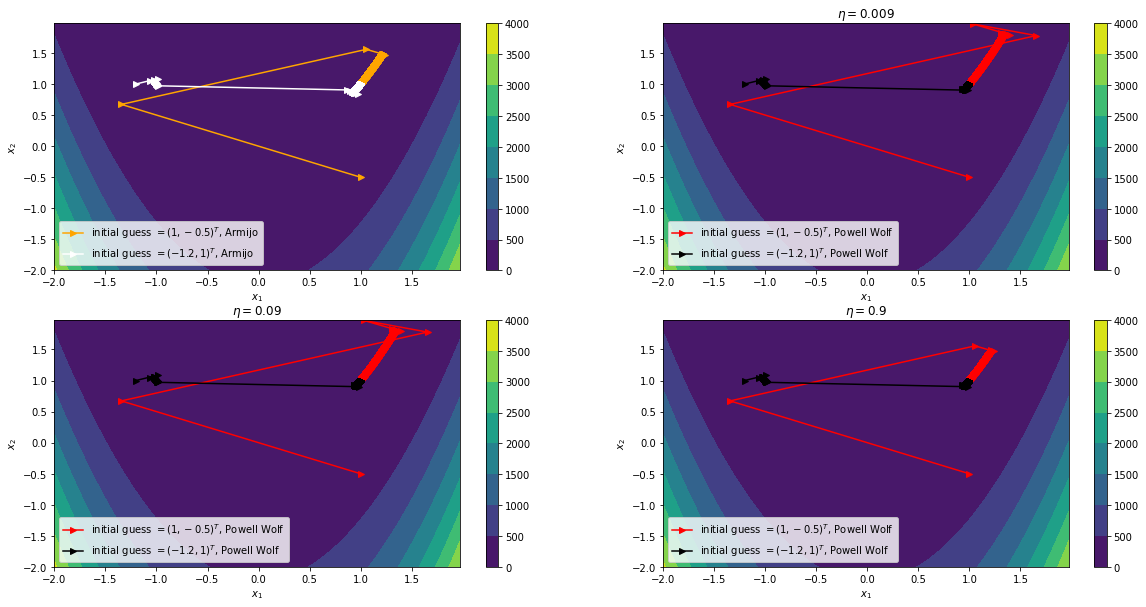

In [8]:
plt.figure(figsize = (20,10))
ax = []
for _ in range(1,5):
    ax.append(plt.subplot(int('22'+str(_))))


min_x1 = -2
max_x1 = 2
min_x2 = -2
max_x2 = 2
step_x1 = 0.025
step_x2 = 0.025

x1 = np.arange(min_x1, max_x1, step_x1)
x2 = np.arange(min_x2, max_x2, step_x2)
x1, x2 = np.meshgrid(x1, x2)
f_x = 100 * (x2 - x1**2)**2 + (1 - x1)**2

# 2D contour plot
#two_d_plot = ax1.contourf(x1, x2, f_x, cmap=cm.viridis )
#cbar = fig.colorbar(two_d_plot)
for i in range(4):
    ax_contour = ax[i].contourf(x1, x2, f_x, cmap=cm.viridis )
    plt.colorbar(mappable = ax_contour, ax=ax[i])
# Representing the iterates
eta = [0.009, 0.09, 0.9]
for i in range(len(eta)+1):
    if i<1:
        L1 = steepestdesc_armijo(f, gradf, np.array([1,-0.5]))
        ax[i].plot(L1[0:,0], L1[0:,1], color='orange', marker ='>', label = "initial guess $=(1,-0.5)^T$, Armijo")
        L2 = steepestdesc_armijo(f, gradf, np.array([-1.2,1]))
        ax[i].plot(L2[0:,0], L2[0:,1], color='white', marker ='>', label = "initial guess $=(-1.2,1)^T$, Armijo")
    else:
        L1 = steepestdesc_pw(f, gradf, np.array([1,-0.5]), eta=eta[i-1])
        ax[i].plot(L1[0:,0], L1[0:,1], color='red', marker ='>', label = "initial guess $=(1,-0.5)^T$, Powell Wolf")
        L2 = steepestdesc_pw(f, gradf, np.array([-1.2,1]), eta=eta[i-1])
        ax[i].plot(L2[0:,0], L2[0:,1], color='black', marker ='>', label = "initial guess $=(-1.2,1)^T$, Powell Wolf")
        ax[i].set_title("$\eta = {}$".format(eta[i-1]))
    ax[i].legend()
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")


Comments: The iterates given with the Armijo rule and the Powell Wolfe strategy look the same when all the overlapping paramaters are set equal and when $\eta$ gets closer to $1$

# Local Newton method

In [9]:
def localnewton(f, gradf, hessf, x0, e = 10**(-9), maxit = 10**(4)):
    '''returns the iterates of the local Newton method algorithm
    '''
    x = x0
    gradf_x = gradf(x)
    hessf_x = hessf(x)
    iterates = [x] + [0]*maxit
    n_iter = 0
    while n_iter < maxit and np.sqrt(gradf_x@gradf_x) > e:
        x = x + np.linalg.solve(hessf_x, -gradf_x)
        gradf_x = gradf(x)
        hessf_x = hessf(x)
        iterates[n_iter+1] = x
        n_iter+=1
        
    return np.array(iterates[:n_iter+1])

In [10]:
f = lambda x: 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

gradf = lambda x: np.array([ - 400 * x[0] * (x[1]-x[0]**2) - 2 * (1-x[0]), 200 * (x[1]-x[0]**2)])

hessf = lambda x: np.array([[2 - 400 * (x[1] - 3 * x[0]**2),  - 400 * x[0]],
                            [- 400 * x[0], 200]
                           ])

localnewton(f, gradf, hessf, np.array([1,-0.5]))

array([[ 1. , -0.5],
       [ 1. ,  1. ]])

In [11]:
localnewton(f, gradf, hessf, np.array([-1.2, 1]))

array([[-1.2       ,  1.        ],
       [-1.1752809 ,  1.38067416],
       [ 0.76311487, -3.17503385],
       [ 0.76342968,  0.58282478],
       [ 0.99999531,  0.94402732],
       [ 0.9999957 ,  0.99999139],
       [ 1.        ,  1.        ],
       [ 1.        ,  1.        ]])

Text(0, 0.5, '$x_2$')

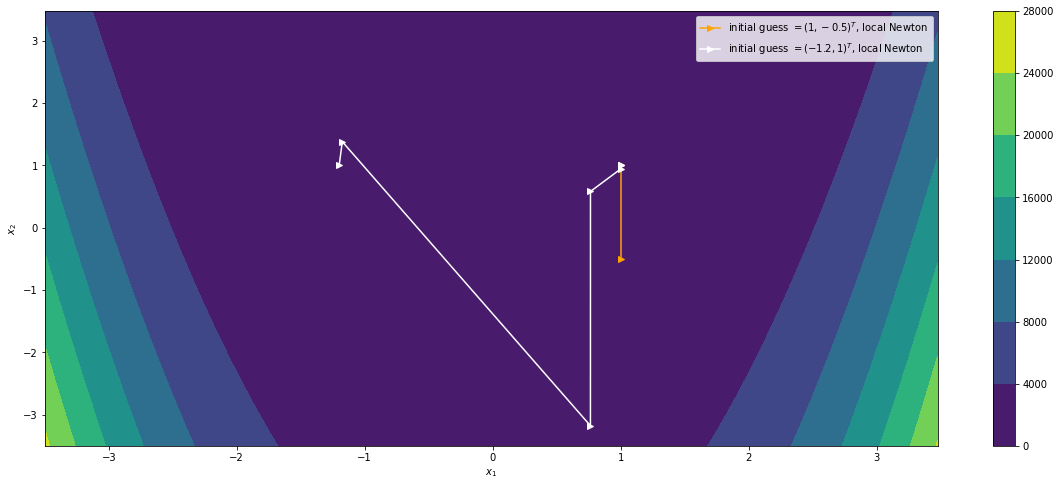

In [12]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(111)



min_x1 = -3.5
max_x1 = 3.5
min_x2 = -3.5
max_x2 = 3.5
step_x1 = 0.025
step_x2 = 0.025

x1 = np.arange(min_x1, max_x1, step_x1)
x2 = np.arange(min_x2, max_x2, step_x2)
x1, x2 = np.meshgrid(x1, x2)
f_x = 100 * (x2 - x1**2)**2 + (1 - x1)**2

# 2D contour plot
two_d_plot = ax1.contourf(x1, x2, f_x, cmap=cm.viridis )
cbar = fig.colorbar(two_d_plot)



# Representing the iterates
## With Armijo rule
L1 = localnewton(f, gradf, hessf, np.array([1,-0.5]))
ax1.plot(L1[0:,0], L1[0:,1], color='orange', marker ='>', label = "initial guess $=(1,-0.5)^T$, local Newton ")
L2 = localnewton(f, gradf, hessf, np.array([-1.2, 1]))
ax1.plot(L2[0:,0], L2[0:,1], color='white', marker ='>', label = "initial guess $=(-1.2,1)^T$, local Newton")

ax1.legend()
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")

Way faster when the starting point is not far from the local extrema. A global method is needed to converge at any starting point

# Globalization of Newton-like methods

In [13]:
def globalnewtonlike(f, gradf, Mkf, x0, e=10**(-6), maxit=100, beta=0.5, gamma=10**(-4), a1=10**(-6), a2=10**(-6), p=0.1):
    '''returns the iterates generated by the global Newton like method
    '''
    x = x0
    gradf_x = gradf(x)
    Mkf_x = Mkf(x)
    it = [x0] + [0]*maxit
    n_iter = 0
    while n_iter < maxit and np.sqrt(gradf_x@gradf_x) > e: 
        # Getting the direction 
        try:
            d_N = np.linalg.solve(Mkf_x, -gradf_x)
            if np.sqrt(d_N@d_N)>e and -gradf_x@d_N>= min(a1, a2*np.sqrt(d_N@d_N)**p)*np.sqrt(d_N@d_N)**2:
                d_k = d_N
                marker = 'N'
            else:
                d_k = -gradf_x
                marker = 'G'
        except:
            d_k = -gradf_x
            marker = 'G'
            
        sigma = armijo(f, gradf, x, -gradf_x, beta=beta, gamma=gamma)
        x = x+sigma*d_k
        it[n_iter+1]=x
        gradf_x = gradf(x)
        Mkf_x = Mkf(x)
        
        print("iteration: " + str(n_iter+1))
        print("iterate: {}" .format(x))
        print("function value: {}".format(round(f(x),3)))
        print("step size: " + str(round(sigma,3)))
        print("norm gradient: " + str(round(np.sqrt(gradf_x@gradf_x),3)))
        print("marker: "  + marker)
        if n_iter>=1:
            print("contraction rate: {}".format(
                  round(np.sqrt(((it[n_iter+1]-it[n_iter])@(it[n_iter+1]-it[n_iter])) / \
                                    ((it[n_iter]-it[n_iter-1])@(it[n_iter]-it[n_iter-1]))
                               ),3
                        
                        )
                                                )
                 )
        else:
            print("contraction rate: Not defined")
        
        n_iter+=1   
        print("\n")     
    print("--------------------------------------------------------------------------------------------------")
    return np.array(it[:n_iter+1])

In [14]:
f1 = lambda x:  np.log(np.exp(x[0]) + np.exp(-x[0])) + x[1]**2
gradf1 = lambda x: np.array([(np.exp(x[0]) - np.exp(-x[0]))/(np.exp(x[0]) + np.exp(-x[0])), 2*x[1]])
hessf1 = lambda x: np.array([[4/(np.exp(x[0]) + np.exp(-x[0]))**2, 0],
                            [0 , 2]
                           ])


f2 = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
gradf2 = lambda x: np.array([4*x[0]*(x[0]**2+x[1]-11) + 2*(x[0]+x[1]**2-7),
                             2*(x[0]**2+x[1]-11) + 2*x[1]*(x[0]+x[1]**2-7)
                            ]
                           )
hessf2 = lambda x: np.array([[4*(3*x[0]**2+x[1]-11)+2, 4*x[0]+4*x[1]],
                             [4*x[0]+4*x[1], 4*(3*x[1]**2+x[0]-7)+2]
                            ]
                            )
x0a = np.array([1,-0.5])
x0b = np.array([-1.2, 1])
x0c = np.array([5,5])
x0 = [x0a,x0b,x0c]

## $f_1(x) = \log(\exp(x_1) + \exp(-x_1)) + x_2^2$ 

$0$ is the only stationnary point and is a local minimum (Sufficient Second Order Optimality Condition)

### Exact Hessian

In [15]:
for x_0 in x0:
    globalnewtonlike(f1, gradf1, hessf1, x_0)

iteration: 1
iterate: [-0.8134302  0.       ]
function value: 0.993
step size: 1
norm gradient: 0.671
marker: N
contraction rate: Not defined


iteration: 2
iterate: [0.40940232 0.        ]
function value: 0.775
step size: 1
norm gradient: 0.388
marker: N
contraction rate: 0.65


iteration: 3
iterate: [-0.04730492  0.        ]
function value: 0.694
step size: 1
norm gradient: 0.047
marker: N
contraction rate: 0.373


iteration: 4
iterate: [7.06028036e-05 0.00000000e+00]
function value: 0.693
step size: 1
norm gradient: 0.0
marker: N
contraction rate: 0.104


iteration: 5
iterate: [-2.34706609e-13  0.00000000e+00]
function value: 0.693
step size: 1
norm gradient: 0.0
marker: N
contraction rate: 0.001


--------------------------------------------------------------------------------------------------
iteration: 1
iterate: [1.53311461 0.        ]
function value: 1.579
step size: 1
norm gradient: 0.911
marker: N
contraction rate: Not defined


iteration: 2
iterate: [-3.82044269  0.        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


It seems that when the initial guess is far from 0 (e.g $(5,5)^T$), then the algorithm struggles finding the stationnary point (0,0) (above all when it uses Gradient descent method to update the iterates, it seems to converge very slowly).

When using this method with the exact hessian, the choice of the initial guess seems to matter a lot.

### Diagonal of the exact Hessian

In [16]:
diag_hessf1 = lambda x: np.array([[4/(np.exp(x[0]) + np.exp(-x[0]))**2, 0],
                                   [0, 2]
                                 ])

In [17]:
for x_0 in x0:
    globalnewtonlike(f1, gradf1, diag_hessf1, x_0)

iteration: 1
iterate: [-0.8134302  0.       ]
function value: 0.993
step size: 1
norm gradient: 0.671
marker: N
contraction rate: Not defined


iteration: 2
iterate: [0.40940232 0.        ]
function value: 0.775
step size: 1
norm gradient: 0.388
marker: N
contraction rate: 0.65


iteration: 3
iterate: [-0.04730492  0.        ]
function value: 0.694
step size: 1
norm gradient: 0.047
marker: N
contraction rate: 0.373


iteration: 4
iterate: [7.06028036e-05 0.00000000e+00]
function value: 0.693
step size: 1
norm gradient: 0.0
marker: N
contraction rate: 0.104


iteration: 5
iterate: [-2.34706609e-13  0.00000000e+00]
function value: 0.693
step size: 1
norm gradient: 0.0
marker: N
contraction rate: 0.001


--------------------------------------------------------------------------------------------------
iteration: 1
iterate: [1.53311461 0.        ]
function value: 1.579
step size: 1
norm gradient: 0.911
marker: N
contraction rate: Not defined


iteration: 2
iterate: [-3.82044269  0.        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


The result is the same as previously because the Hessian matrix is equal to its diagonal matrix.

### Constant approximation by initial Hessian

In [18]:
for x_0 in x0:
    const_hessf1 = lambda x: np.array([[4/(np.exp(x_0[0]) + np.exp(-x_0[0]))**2, 0],
                            [0 , 2]
                           ])
    globalnewtonlike(f1, gradf1, const_hessf1, x_0)

iteration: 1
iterate: [-0.8134302  0.       ]
function value: 0.993
step size: 1
norm gradient: 0.671
marker: N
contraction rate: Not defined


iteration: 2
iterate: [0.78542505 0.        ]
function value: 0.974
step size: 1
norm gradient: 0.656
marker: N
contraction rate: 0.85


iteration: 3
iterate: [-0.7761216  0.       ]
function value: 0.968
step size: 1
norm gradient: 0.65
marker: N
contraction rate: 0.977


iteration: 4
iterate: [0.77272294 0.        ]
function value: 0.966
step size: 1
norm gradient: 0.649
marker: N
contraction rate: 0.992


iteration: 5
iterate: [-0.77144283  0.        ]
function value: 0.965
step size: 1
norm gradient: 0.648
marker: N
contraction rate: 0.997


iteration: 6
iterate: [0.77095532 0.        ]
function value: 0.965
step size: 1
norm gradient: 0.647
marker: N
contraction rate: 0.999


iteration: 7
iterate: [-0.77076889  0.        ]
function value: 0.965
step size: 1
norm gradient: 0.647
marker: N
contraction rate: 1.0


iteration: 8
iterate: [0.770

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


The iterates seem to be stuck at the same values

## $f_2(x) = (x_1^2 + x_2 - 11)^2 + (x_1+x_2^2-7)^2$

### Exact Hessian

In [19]:
for x_0 in x0:
    globalnewtonlike(f2, gradf2, hessf2, x_0)

iteration: 1
iterate: [4.34375  0.453125]
function value: 75.251
step size: 0.062
norm gradient: 140.423
marker: G
contraction rate: Not defined


iteration: 2
iterate: [4.33202467 0.45318261]
function value: 73.627
step size: 0.016
norm gradient: 138.237
marker: N
contraction rate: 0.003


iteration: 3
iterate: [4.3204154  0.45314667]
function value: 72.042
step size: 0.016
norm gradient: 136.085
marker: N
contraction rate: 0.99


iteration: 4
iterate: [4.30892133 0.45302116]
function value: 70.497
step size: 0.016
norm gradient: 133.967
marker: N
contraction rate: 0.99


iteration: 5
iterate: [4.29754161 0.45280997]
function value: 68.99
step size: 0.016
norm gradient: 131.881
marker: N
contraction rate: 0.99


iteration: 6
iterate: [4.28627537 0.45251683]
function value: 67.52
step size: 0.016
norm gradient: 129.828
marker: N
contraction rate: 0.99


iteration: 7
iterate: [4.27512179 0.45214537]
function value: 66.087
step size: 0.016
norm gradient: 127.807
marker: N
contraction rat

### Diagonal of the exact Hessian

In [20]:
diag_hessf2 = lambda x: np.array([[4*(3*x[0]**2+x[1]-11)+2, 0],
                             [0, 4*(3*x[1]**2+x[0]-7)+2]
                            ]
                                )

In [21]:
for x_0 in x0:
    globalnewtonlike(f2, gradf2, diag_hessf2, x_0)

iteration: 1
iterate: [4.34375  0.453125]
function value: 75.251
step size: 0.062
norm gradient: 140.423
marker: G
contraction rate: Not defined


iteration: 2
iterate: [4.3320306  0.48969859]
function value: 74.061
step size: 0.016
norm gradient: 138.929
marker: N
contraction rate: 0.011


iteration: 3
iterate: [4.32036752 0.52781372]
function value: 72.897
step size: 0.016
norm gradient: 137.491
marker: N
contraction rate: 1.038


iteration: 4
iterate: [4.30875757 0.56807804]
function value: 71.763
step size: 0.016
norm gradient: 136.122
marker: N
contraction rate: 1.051


iteration: 5
iterate: [4.29719666 0.61143569]
function value: 70.667
step size: 0.016
norm gradient: 134.84
marker: N
contraction rate: 1.071


iteration: 6
iterate: [4.28567925 0.65950923]
function value: 69.621
step size: 0.016
norm gradient: 133.676
marker: N
contraction rate: 1.102


iteration: 7
iterate: [4.2741973  0.71554581]
function value: 68.65
step size: 0.016
norm gradient: 132.697
marker: N
contraction

It seems that both previous methods provide quite similar iterates.

### Constant approximation by initial Hessian

In [22]:
for x_0 in x0:
    const_hessf2 = lambda x: np.array([[4*(3*x_0[0]**2+x_0[1]-11)+2, 4*x_0[0]+4*x_0[1]],
                             [4*x_0[0]+4*x_0[1], 4*(3*x_0[1]**2+x_0[0]-7)+2]
                            ]
                            )
    globalnewtonlike(f2, gradf2, const_hessf2, x_0)

iteration: 1
iterate: [4.34375  0.453125]
function value: 75.251
step size: 0.062
norm gradient: 140.423
marker: G
contraction rate: Not defined


iteration: 2
iterate: [2.16124153 0.22779024]
function value: 60.139
step size: 0.016
norm gradient: 63.957
marker: G
contraction rate: 0.631


iteration: 3
iterate: [4.10870387 0.67726818]
function value: 48.934
step size: 0.031
norm gradient: 103.394
marker: G
contraction rate: 0.911


iteration: 4
iterate: [2.50048397 0.52379348]
function value: 35.692
step size: 0.016
norm gradient: 52.305
marker: G
contraction rate: 0.808


iteration: 5
iterate: [3.2926145  0.72494647]
function value: 10.445
step size: 0.016
norm gradient: 3.649
marker: G
contraction rate: 0.506


iteration: 6
iterate: [2.74552251 2.46535208]
function value: 4.319
step size: 0.5
norm gradient: 10.112
marker: G
contraction rate: 2.232


iteration: 7
iterate: [3.20173976 2.02800527]
function value: 1.735
step size: 0.062
norm gradient: 17.438
marker: G
contraction rate: 0

$(3,2)$ and $(-2.8, 3.1)$ seem to be solutions  because the function value at those points $\approx 0$, the gradient at those points $\approx 0$ and the hessian at those points is respectively:

$$\nabla^2 f_2(3,2) = 
\begin{pmatrix}
74 & 20\\
20  & 34
\end{pmatrix}$$
of eigen values $54 \pm \sqrt{800}\approx 26$ and  $82$>0.

And 

$$ 
\nabla^2 f_2(-2.8, 3.1) = 
\begin{pmatrix}
64.48 & 1.2\\
1.2  & 78.12
\end{pmatrix}
$$
of eigen values $\approx 78$ and $64 $ 